### Reading data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = np.loadtxt('preprocessed_Data.csv',delimiter=",")

In [8]:
prepared_data = []
for i in range(0,data.shape[0],30):
    prepared_data.append(data[i:i+30])
prepared_data = np.array(prepared_data)

In [17]:
data_train = np.loadtxt('preprocessed_Data_train.csv',delimiter=",")
data_test = np.loadtxt('preprocessed_Data_test.csv',delimiter=",")

In [18]:
prepared_data_train, prepared_data_test = [],[]
for i in range(0,data_train.shape[0],30):
    prepared_data_train.append(data_train[i:i+30])

for i in range(0,data_test.shape[0],30):
    prepared_data_test.append(data_test[i:i+30])

prepared_data_train = np.array(prepared_data_train)
prepared_data_test = np.array(prepared_data_test)

In [19]:
prepared_data_train.shape

(30101, 30, 4)

## Building the model

In [20]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import TimeDistributed

In [21]:
def encoder(model):
    model.add(LSTM(15, activation='relu', return_sequences=True, input_shape=(prepared_data_train.shape[1], prepared_data_train.shape[2])))
    model.add(LSTM(10, activation='relu', return_sequences=True))
    model.add(LSTM(5, activation='relu', return_sequences=True))
    return model

def decoder(model):
    model.add(LSTM(5, activation='relu', return_sequences=True))
    model.add(LSTM(10, activation='relu', return_sequences=True))
    model.add(LSTM(15, activation='relu', return_sequences=True))
    model.add(TimeDistributed(Dense(4)))
    return model

### Model execution

In [22]:
with tensorflow.device("/cpu:0"):
    model = Sequential()
    enc_model = encoder(model)
    dec_model = decoder(enc_model)
    dec_model.compile(optimizer='adam', loss='mse')
    # fit model
    dec_model.fit(prepared_data_train, prepared_data_train, epochs=10, verbose=1)

Epoch 1/10
941/941 [==============================] - 31s 28ms/step - loss: 0.1050
Epoch 2/10
941/941 [==============================] - 27s 29ms/step - loss: 0.0078
Epoch 3/10
941/941 [==============================] - 28s 30ms/step - loss: 0.0071
Epoch 4/10
941/941 [==============================] - 26s 28ms/step - loss: 0.0024
Epoch 5/10
941/941 [==============================] - 27s 29ms/step - loss: 0.0015
Epoch 6/10
941/941 [==============================] - 26s 28ms/step - loss: 0.0013
Epoch 7/10
941/941 [==============================] - 26s 28ms/step - loss: 0.0011
Epoch 8/10
941/941 [==============================] - 26s 28ms/step - loss: 0.0011
Epoch 9/10
941/941 [==============================] - 26s 28ms/step - loss: 8.7521e-04
Epoch 10/10
941/941 [==============================] - 26s 28ms/step - loss: 8.5095e-04


### Autoencoder evaluation

In [23]:
# demonstrate prediction
x_input = prepared_data_train[0].reshape((1, prepared_data_train.shape[1], prepared_data_train.shape[2]))
yhat = dec_model.predict(x_input, verbose=0)
print(yhat)

[[[0.8786361  0.87531936 0.3060601  0.302039  ]
  [0.8751392  0.8790767  0.29921648 0.26462492]
  [0.88559765 0.88419914 0.3058384  0.23429248]
  [0.8846537  0.8825524  0.31080335 0.2155838 ]
  [0.8919794  0.88716865 0.31414747 0.20943072]
  [0.8970141  0.88897276 0.31489936 0.20834301]
  [0.8988952  0.8888737  0.31437486 0.20880152]
  [0.8992146  0.88820577 0.31368864 0.20988713]
  [0.89914644 0.8875593  0.3131855  0.2111451 ]
  [0.898957   0.8870814  0.31299174 0.2130038 ]
  [0.8986364  0.8866674  0.31295818 0.21526867]
  [0.89814574 0.88618696 0.31288597 0.21739092]
  [0.89747506 0.8856176  0.31272474 0.21916391]
  [0.8966827  0.88499975 0.3124935  0.22055052]
  [0.895844   0.88438416 0.3122276  0.22158219]
  [0.89502835 0.88381374 0.31195948 0.22231229]
  [0.89429265 0.8833189  0.3117128  0.22279572]
  [0.89367694 0.8829175  0.31150174 0.22307982]
  [0.89320594 0.88261783 0.31133258 0.22320256]
  [0.89289105 0.88242006 0.31120616 0.22319318]
  [0.89273334 0.8823198  0.31112    0.22

In [24]:
prepared_data_train[0]

array([[0.89986348, 0.88514948, 0.30708322, 0.20280075],
       [0.89916515, 0.88518691, 0.30708322, 0.20280266],
       [0.89916277, 0.88518786, 0.30708322, 0.20280266],
       [0.89915776, 0.88518858, 0.30708322, 0.20280266],
       [0.89915705, 0.88518953, 0.30708322, 0.20280266],
       [0.89915156, 0.88518953, 0.30708322, 0.20280266],
       [0.89914918, 0.88518858, 0.30708322, 0.20280266],
       [0.8991468 , 0.88518929, 0.30708322, 0.20280266],
       [0.89913964, 0.88519073, 0.30708322, 0.20280266],
       [0.89912081, 0.88519573, 0.30708322, 0.20280266],
       [0.8991034 , 0.88519907, 0.30708322, 0.20280266],
       [0.89907455, 0.88519716, 0.30708322, 0.20280266],
       [0.89905715, 0.88519716, 0.30708322, 0.20280266],
       [0.89901543, 0.88519621, 0.30708322, 0.20280266],
       [0.89899421, 0.88519454, 0.30708322, 0.20280266],
       [0.89897847, 0.88519406, 0.30708322, 0.20280266],
       [0.89896393, 0.88519406, 0.30708322, 0.20280266],
       [0.89894962, 0.88519406,

In [25]:
yhat = dec_model.predict(prepared_data_train)

### Defining a function to calculate the error for each trajectory

In [26]:
def error_by_entry(y_real,y_pred):
    errors = []
    for real,pred in zip(y_real,y_pred):
        acc = 0
        for i,j in zip(real,pred):
            for k,l in zip(i,j):
                acc += abs(k-l)
        errors.append(acc)
    return errors

In [27]:
errors = error_by_entry(prepared_data_train,yhat)

In [28]:
errors = np.array(errors)

(0.0, 6.0)

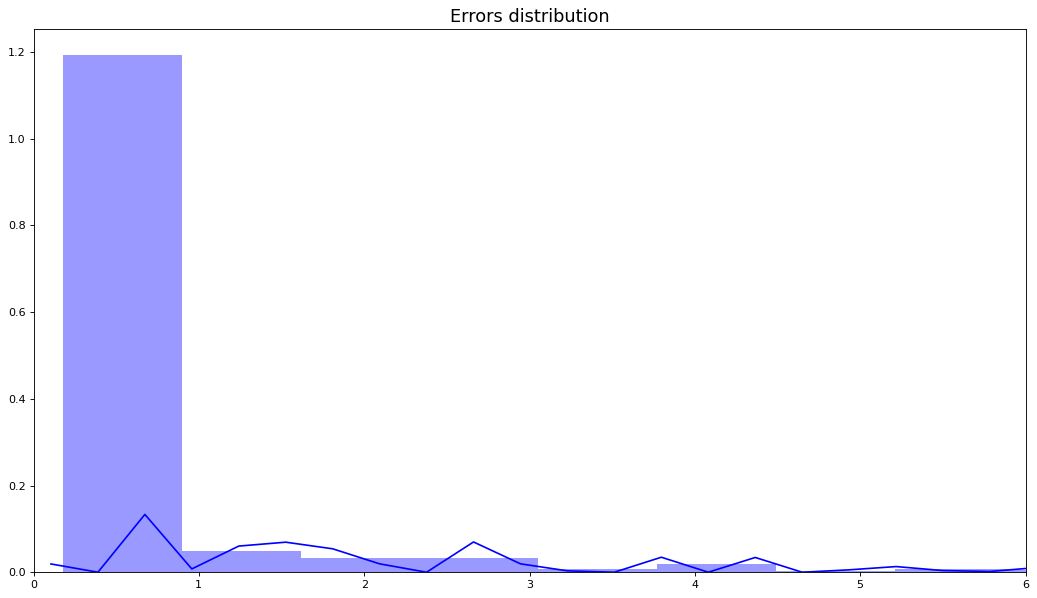

In [29]:
plt.figure(figsize=(16,9), dpi=80)
plt.title('Errors distribution', fontsize=16)
sns.distplot(errors, color='blue', bins=50)
plt.xlim([0.0, 6])

### RAMSAC

In [35]:
iterations = []
entries = [prepared_data_train]
entries_err = [errors]
max_iter = 3
models = []
for i in range(max_iter):
    treshold = entries_err[i].mean() + 2 * entries_err[i].std()
    new_entries = []
    ite = []
    for j,k in zip(entries_err[i], entries[i]):
        if (j < treshold):
            new_entries.append(k)
        else:
            ite.append(k)
    new_ent = np.array(new_entries)
    it = np.array(ite)
    iterations.append(it)
    entries.append(new_ent)
    with tensorflow.device("/cpu:0"):
        model = Sequential()
        enc_model = encoder(model)
        dec_model = decoder(enc_model)
        dec_model.compile(optimizer='adam', loss='mse')
        # fit model
        dec_model.fit(new_ent, new_ent, epochs=10, verbose=1)
        models.append(dec_model)
    new_yhat = dec_model.predict(new_ent)
    new_err = error_by_entry(new_ent,new_yhat)
    entries_err.append(np.array(new_err))
    

Epoch 1/10
362/362 [==============================] - 18s 34ms/step - loss: 0.1987
Epoch 2/10
362/362 [==============================] - 12s 34ms/step - loss: 0.0104
Epoch 3/10
362/362 [==============================] - 12s 33ms/step - loss: 0.0028
Epoch 4/10
362/362 [==============================] - 13s 35ms/step - loss: 0.0011
Epoch 5/10
362/362 [==============================] - 11s 31ms/step - loss: 7.5047e-04
Epoch 6/10
362/362 [==============================] - 11s 29ms/step - loss: 6.0930e-04
Epoch 7/10
362/362 [==============================] - 11s 29ms/step - loss: 5.6926e-04
Epoch 8/10
362/362 [==============================] - 11s 29ms/step - loss: 5.2298e-04
Epoch 9/10
362/362 [==============================] - 11s 30ms/step - loss: 4.8457e-04
Epoch 10/10
362/362 [==============================] - 10s 29ms/step - loss: 4.4740e-04
Epoch 1/10
335/335 [==============================] - 14s 29ms/step - loss: 0.1936
Epoch 2/10
335/335 [==============================] - 10s 29ms

In [31]:
print(new_ent.shape, it.shape)

(26138, 30, 4) (1399, 30, 4)


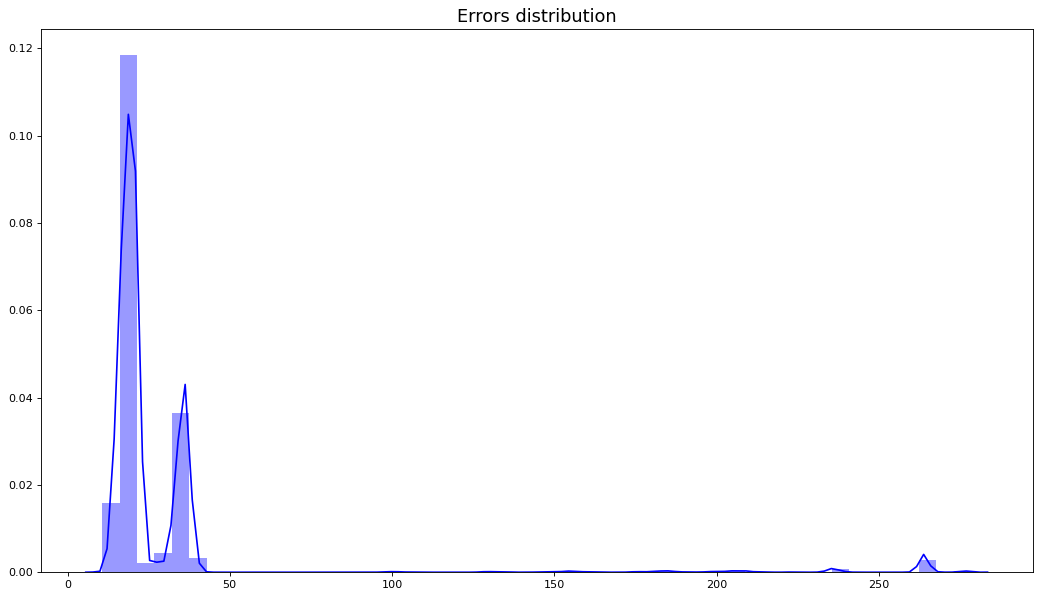

In [37]:
yhat = models[2].predict(prepared_data_test)
errors = np.array(error_by_entry(prepared_data_test,yhat))
plt.figure(figsize=(16,9), dpi=80)
plt.title('Errors distribution', fontsize=16)
sns.distplot(errors, color='blue', bins=50)
#plt.xlim([0.0, 6])

### Finding anomalies using mean and standard deviation method

In [62]:
errors.mean()

29.4207893467342

In [56]:
thresh = errors.mean() + 2 * errors.std()

In [57]:
thresh

105.4680770529388

In [58]:
def anomalies(errors,thresh):
    ret = []
    for i in range(0,errors.shape[0]):
        if(errors[i] > thresh):
            ret.append(i)
    return(ret)

In [59]:
ret = anomalies(errors, thresh)

In [60]:
print(errors.shape,len(ret))

(11798,) 374


In [75]:
data_taxi = np.loadtxt('preprocessed_Data_walk.csv',delimiter=",")
prepared_data_taxi = []
for i in range(0,data_taxi.shape[0],30):
    prepared_data_taxi.append(data_taxi[i:i+30])
prepared_data_taxi = np.array(prepared_data_taxi)

In [76]:
prepared_data_taxi.shape

(51882, 30, 4)

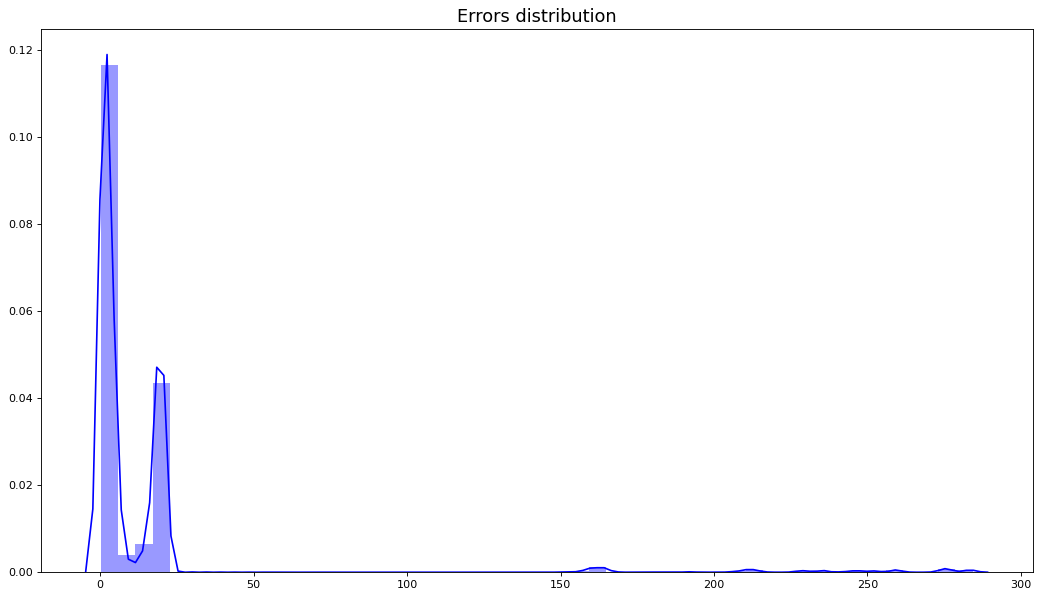

In [77]:
yhat_taxi = models[2].predict(prepared_data_taxi)
errors_taxi = np.array(error_by_entry(prepared_data_taxi,yhat_taxi))
plt.figure(figsize=(16,9), dpi=80)
plt.title('Errors distribution', fontsize=16)
sns.distplot(errors_taxi, color='blue', bins=50)

In [78]:
errors_taxi.mean()

13.77434086621593

In [79]:
ret = anomalies(errors_taxi, thresh)
print(errors_taxi.shape,len(ret))

(51882,) 1623
